# 선형 회귀
* 특성과 타깃 사이의 **관계**를 가장 잘 나타내는 **선형 방정식**을 찾음
* 직선 방정식: 특성이 하나인 경우
* 선형 회귀가 찾은 관계는 계수 또는 가중치에 저장
* 머신러닝에서의 가중치는 방정식의 기울기와 절편

# 선형 회귀 알고리즘 Linear Regression
1. 임의의 직선을 그음
2. 이에 대한 평균 제곱 오차를 구함
3. 그 값을 가장 작게 만들 a, b 값을 찾아감

* `y = ax + b` : 2개 이상의 독립 변수와 종속 변수 사이의 관계식

#### 결과

* 직선: 0에 가까운 일직선
* 직선: 위에서 아래로 (음수) ➡ 잘 나오지는 Xx
* 직선: 아래에서 위로 (최적) ➡ 만들어야 할 모양

> ⭐ **독립 변수(입력) x와 종속 변수(정답) y 관계를 표현하는 선형 방정식을 찾고, 찾아낸 방정식을 이용해 새로운 입력 값에 대한 결과를 예측하는 모델링 방법**

* 목표: 예측 값과 실제 값 사이의 차이가 가장 작아지는 절편, 기울기 찾기

### 단순 선형 회귀 simple linear regression
* 하나의 x값으로 y값을 설명할 수 Oo
* 특성이 하나

### 다중 선형 회귀 multiple linear resgression
* x값이 여러 개 필요할 때
* 특성이 2개 이상






## k-최근접 이웃의 한계
* 학습한 데이터 범위 내에서만 예측 가능

In [2]:
import numpy as np

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

In [6]:
from sklearn.model_selection import train_test_split

In [8]:
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

In [9]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [10]:
from sklearn.neighbors import KNeighborsRegressor

### 선형 회귀 알고리즘

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
# 알고리즘
lr = LinearRegression()

lr.fit(train_input, train_target)

LinearRegression()

In [14]:
# 생선 길이가 50일 때의 무게 체크
print(lr.predict([[50]]))

[1241.83860323]


### 기울기 값 확인
* 선형일 때는 y = ax + b가 성립되기 때문에 기울기가 有
   * a : 기울기 `.coef_`
   * b : 절편 `.intercept_`

In [15]:
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


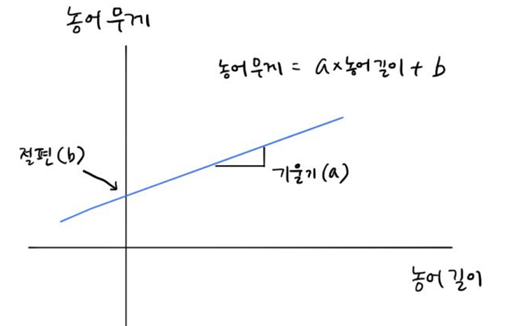

### 그래프를 그려서 분포 확인

In [16]:
import matplotlib.pyplot as plt

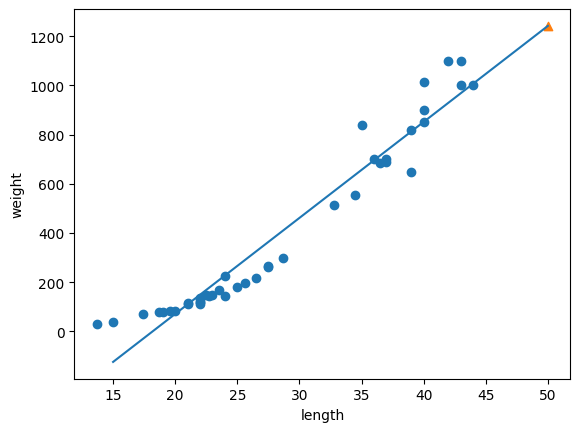

In [18]:
# 산점도
plt.scatter(train_input, train_target)

# 15에서 50까지 1차 방정식 그래프 그림
plt.plot([15, 50], [15 * lr.coef_ + lr.intercept_, 50*lr.coef_ + lr.intercept_])

# 50cm 농어 데이터
plt.scatter(50, 1241.8, marker="^")
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [19]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.939846333997604
0.8247503123313558


* 훈련: 0.93
* 테스트: 0.82

과대적합이라 볼 것인가? 적합하다고 볼 것인가? ➡ 문제점 발생

* why? 선형인 데이터에 직선을 그렸기 때문에 오차가 발생한 데이터가 존재함
* 이 오차 범위를 줄이면 됨
* how? 선형 회귀의 방법 중 다항 회귀 사용

### 다항 회귀 Ploynomial Regression
* (42, 1) (14, 1)이었더 걸 (42, 2) (14, 2)로 바꿔 두 개의 값을 함께 넣을 것
* 열이 두 개가 된 것 (제곱한 값, 기본 값)

In [20]:
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

In [22]:
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [23]:
lr = LinearRegression()
lr.fit(train_poly, train_target) #변경된 값으로 학습

print(lr.predict([[50**2, 50]])) # 50을 제곱한 값, 50일 때의 값 == 특성 두 개 이상 === 다항 회귀

[1573.98423528]


In [24]:
print(lr.coef_, lr.intercept_) # 기울기와 절편 확인

[  1.01433211 -21.55792498] 116.0502107827827


In [27]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122


* 훈련: 0.97
* 테스트: 0.97

➡ **비등비등해진 결과**값을 알 수 있음

그러나 소숫점으로 봤을 때에는 과소적합이라 볼 수 Oo

### 분포도

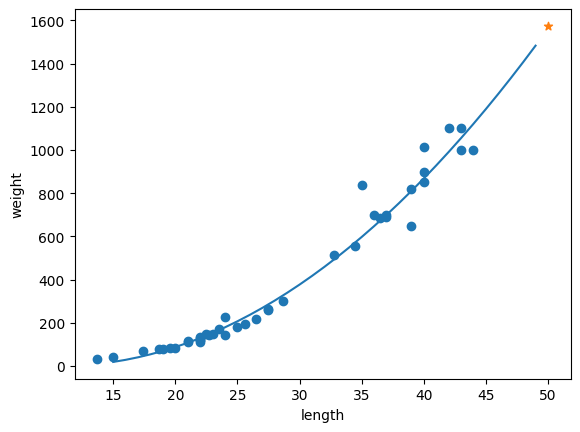

In [25]:
# 직선 그리기 위한 정수 배열
point = np.arange(15, 50)

# 훈련 세트의 산점도
plt.scatter(train_input, train_target)

# 15~49의 방정식 그래프 (기울기와 절편은 위 코드 셋 결과 값)
plt.plot(point, 1.01*point**2 - 21.6*point + 116.06)

# 50cm 농어 데이터
plt.scatter(50, 1574, marker="*")
plt.xlabel("length")
plt.ylabel("weight")
plt.show()